<a href="https://colab.research.google.com/github/thanhnx12/ML_co_ban/blob/main/K_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist #ham cdist de tinh khoang cach giua cac cap diem trong 2 tap hop mot cach hieu qua
import random
from sklearn.cluster import Kmeans

ImportError: ignored

In [40]:
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
#random N diem theo phan phoi chuan
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0) #gop 3 tap X0,X1,X2 vao X
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [15]:
print(original_label) 
print(X.shape)

[0 0 0 ... 2 2 2]
(1500, 2)


In [24]:
def kmeans_init_centroids(X, k):
  # randomly pick k rows of X as initial centroids
  return X[np.random.choice(X.shape[0], k, replace=False)]
def kmeans_assign_labels(X, centroids):
  # calculate pairwise distances btw data and centroids
  D = cdist(X, centroids)
  #print(D)
  # return index of the closest centroid
  #print(np.argmin(D,axis = 1))
  return np.argmin(D, axis = 1)
def has_converged(centroids, new_centroids):
  # return True if two sets of centroids are the same
  return (set([tuple(a) for a in centroids]) ==
    set([tuple(a) for a in new_centroids]))
def kmeans_update_centroids(X, labels, K):
  centroids = np.zeros((K, X.shape[1]))
  for k in range(K):
  # collect all points that are assigned to the k-th cluster
    Xk = X[labels == k, :]
  centroids[k,:] = np.mean(Xk, axis = 0) # then take average
  return centroids

In [16]:
print(kmeans_init_centroids(X,3))

[[2.92052372 5.14371031]
 [3.55316972 5.76714535]
 [0.39518807 3.10826867]]


In [25]:
kmeans_assign_labels(X,kmeans_init_centroids(X,2))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

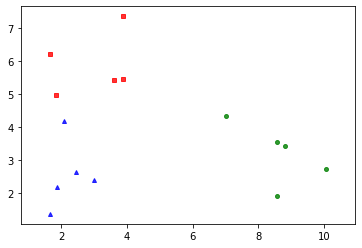

In [36]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [42]:
def kmeans(X, K):
  centroids = [kmeans_init_centroids(X, K)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_labels(X, centroids[-1]))
    new_centroids = kmeans_update_centroids(X, labels[-1], K)
    if has_converged(centroids[-1], new_centroids):
      break
    centroids.append(new_centroids)
    it += 1
  return (centroids, labels, it)

Centers found by our algorithm:
 [[0.         0.        ]
 [0.         0.        ]
 [5.20574422 4.26629466]]


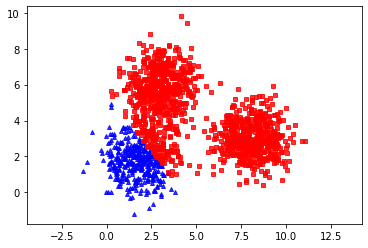

In [43]:
(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1])